# Empirical test of confidence interval procedure

Set up a sequence of values $x_1, x_2, \dots x_n$ and sample a corresponding response $ y_1, y_2, \dots y_n$, each normally distributed around the value of the model equation at the corresponging $x$, that is $y_j \stackrel{iid}{\sim} \mathcal{N}(a-b\times e^{-c x_j},\,\sigma^2)\,$

In [116]:
#libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats.distributions import t as t

Set up functions to simulate the data

Text(0.5,1,'Scatter plot of the simulated data')

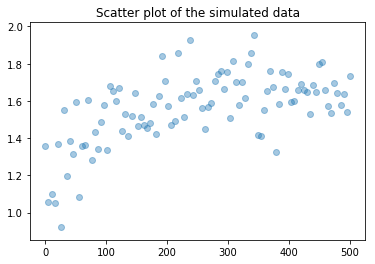

In [120]:
# sample parameters which are plausible for my data

a = 1.632
b = 0.5209
c = 0.0137

# setting up an exponential decay function
def decay(x, intercept, factor, exponent):
    return intercept - factor * np.exp(-exponent * x)

# a function to generate exponential decay with gaussian noise
def generate(intercept, factor, exponent):
    x = np.linspace(0.5,500,num=100)
    y = decay(x, intercept, factor, exponent) + np.random.normal(loc = 0, scale = 0.15, size = 100)
    return(x, y)

# plot and generate some data
np.random.seed(1)
x_array, y_array = generate(a,b,c)
plt.scatter(x_array, y_array, alpha = 0.4)
plt.title('Scatter plot of the simulated data')

Fit the model with `curve_fit` and plot the line of best fit

[1.6638398  0.54903164 0.01106985]


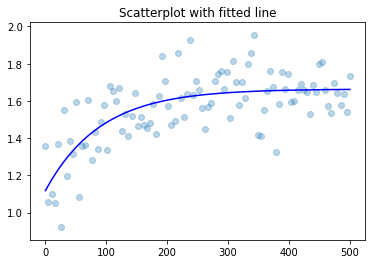

In [121]:
# recording the parameter estimates and their covariance
pars, pcov = curve_fit(decay, x_array, y_array)

# plotting 
plt.scatter(x_array, y_array, alpha = 0.3)
fit = decay(x_array, pars[0], pars[1], pars[2])
plt.plot(x_array,fit,'b-')
plt.title('Scatterplot with fitted line')

print(pars)

Simulating data and calculating confidence intervals for the parameters

In [119]:
repeats = 200 # number of simulation runs
alpha = 0.05 # confidence interval threshold

# setting up lists to record estimates
est_intercept = []
est_factor = []
est_exponent = []

# and lists for confidence intervals' endpoints
left_0 = [] # 0 for the first entry of the parameters vector pars[0]
left_1 = []
left_2 = []

right_0 = []
right_1 = []
right_2 = []

for i in range(repeats):
    
    # simulating data
    x_array, y_array = generate(a,b,c)
       
    # fitting the decay model
    pars, pcov = curve_fit(decay, x_array, y_array)
    
    # recording the estimates in the corresponding lists
    est_intercept.append(pars[0])
    est_factor.append(pars[1])
    est_exponent.append(pars[2])

    #setting up the values for calcualting the confidence intervals
    n = len(x_array)    # number of data points
    p = len(pars) # number of parameters
    dof = max(0, n - p) # degrees of freedom
    tval = t.pdf(1.0-alpha/2., dof) # student-t value for the dof and confidence level
        
    sigma = np.diag(pcov)[0]**0.5 #standard error
    left_0.append(pars[0] - sigma*tval) # recording the left side of the CI
    right_0.append(pars[0] + sigma*tval)
    
    sigma = np.diag(pcov)[1]**0.5    
    left_1.append(pars[1] - sigma*tval)
    right_1.append(pars[1] + sigma*tval)
    
    sigma = np.diag(pcov)[2]**0.5
    left_2.append(pars[2] - sigma*tval)
    right_2.append(pars[2] + sigma*tval) 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Calculating the numeber of simulated runs when the estimates fall outside the confidence intervals

In [115]:
Intercept_trials = pd.DataFrame(list(zip(est_intercept, left_0, right_0)), 
               columns =['Intercept', 'Left Bound', 'Right Bound'])

Factor_trials = pd.DataFrame(list(zip(est_factor, left_1, right_1)),
                            columns =['Factor', 'Left Bound', 'Right Bound'])

Exponent_trials = pd.DataFrame(list(zip(est_exponent, left_2, right_2)),
                              columns = ['Exponent', 'Left Bound', 'Right Bound'])


print( sum(a < Intercept_trials['Left Bound']))
print( sum(b < Factor_trials['Left Bound']))
print( sum(c < Exponent_trials['Left Bound']))


Intercept_trials

87
82
81


,Intercept,Left Bound,Right Bound
0,1.597336,1.592466,1.602206
1,1.659640,1.653847,1.665434
2,1.608070,1.603487,1.612652
3,1.634849,1.628324,1.641373
4,1.596268,1.592039,1.600497
5,1.603726,1.598900,1.608552
6,1.609415,1.603816,1.615014
7,1.689174,1.680770,1.697578
8,1.632929,1.626927,1.638930
9,1.641977,1.636249,1.647704
